### Comparing methods of accessing DRS files on compute platform - part 2

This extends the previous examples of running a compute task (samtools view) on the same data.

This notebook adds the following

* Access the file on NCBI DRS
* Comparison of access to file on a different cloud provider
* Exploration of transferring files from cold storage

The graph below shows the time required to accomplish a number of steps for three different strategies in managing the file and the compute. The compute was run on the Kids First Cavatica platform from Seven Bridges.

The streamed local and link strategies are as previously
* Streamed - samtools is provided the URL obtained from DRS. 
* Local - the file is downloaded from the URL provided by DRS and samtools is provided the path to the local file
* Link - the file is in another workspace on the compute platform

Two additional strategies were explored. In each case the same 15GB cram file as in the previous examples was used. 

The following data captures the time in seconds required for different steps under each strategy.

* transfer - within cloud provider/platform transfer of the file from cloud storage to the working directory for the compute task
* tool load - retrieval from tool repository, and tool start up time (vm instantiation)
* compute - running the tool against the file in the working directory

[These slides](https://docs.google.com/presentation/d/1IwNuiobUwbGnG6MqNWJu_L7fcdGUWYC8/edit#slide=id.g30011d106d2_1_1428) used at the GA4GH Plenary/Connect meeting in September 2024 are based on this workbook.

### Use the NCBI DRS service directly to show details for the file analyzed
This is a 15.4 GB bam file which is available on the Amazon AWS cloud.

The DRS response below shows that it is available on the 

In [2]:
from fasp.loc import SRADRSClient
import json

drs_client = SRADRSClient('https://locate.be-md.ncbi.nlm.nih.gov')
drs_response = drs_client.get_object('3f64ace941c440718c43e9edd64928a2')
print(json.dumps(drs_response, indent=3))

{
   "access_methods": [
      {
         "access_id": "2ef7363985dda918ecc60876ce540b98a0bc1bea6176316c314d67f2517ae86f",
         "region": "s3.us-east-1",
         "type": "https"
      }
   ],
   "checksums": [
      {
         "checksum": "3f64ace941c440718c43e9edd64928a2",
         "type": "md5"
      }
   ],
   "created_time": "2020-05-17T00:52:04Z",
   "id": "3f64ace941c440718c43e9edd64928a2",
   "name": "d868593b-a60a-4686-9a9f-3086cc67b1a3.bam",
   "self_uri": "drs://locate.be-md.ncbi.nlm.nih.gov/3f64ace941c440718c43e9edd64928a2",
   "size": 16546326777
}


### Plot the comparisons as before with the new data for running the compute on the file provided by NCBI DRS.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/workflow_comparisons2.csv")
df2 = df[['strategy','transfer','tool load','compute']]
df2

,strategy,transfer,tool load,compute
0,drs streamed,NaN,11,503
1,local,164.0,11,285
2,link,165.0,9,283
3,ncbi drs aws,163.0,8,272
4,ncbi drs gcp,148.0,14,0


<AxesSubplot:xlabel='strategy', ylabel='Total time secs'>

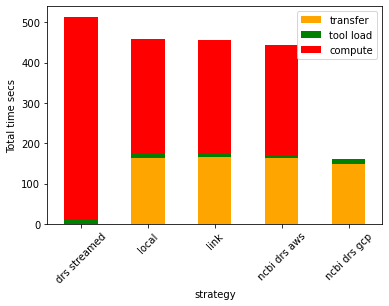

In [6]:
df2.plot.bar(x='strategy', stacked=True, ylabel='Total time secs',
            rot=45,
            color=['orange', 'green', 'red'])

### Obtaining the task data from the log files
In the examples above the data was gathered into csv file manually.
The following extracts the time for each step from the log files themselves.

Start with a table containing the task ids and various attributes for each task.

In [7]:
df3 = pd.read_csv("data/workflow_comparisons3.csv")
df3

,task id,log,samtools,compute cloud,file cloud,file GB,strategy,filename,file,note
0,8c043b3f-7c2d-4f56-85bc-c0852557c3b8,Y,view,AWS,AWS,15.4,NaN,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,UDN bam,NaN
1,66db4fc1-23eb-499a-83ea-3ede2b3d920c,Y,index,GCP,AWS,16.8,NaN,2ac4_41fa.cram,ICAC cram,NaN
2,16c0e503-8abd-48b5-af8d-7273b0b2ce72,Y,index,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,NaN
3,3ec5aeb4-bd25-4aa8-83a1-96c228ec435b,Y,view,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,crai available
4,8b237708-2822-4b5a-b48f-c94681c8a1a3,Y,index,AWS,AWS,16.8,NaN,2ac4_41fa.cram,ICAC cram,NaN
5,cec3faa5-fdc5-46a5-bea1-547589855155,Y,view,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,crai hidden
6,fecfc61a-c652-4ac5-bace-1f1563c348c3,Y,index,GCP,GCP,8.6,NaN,HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522...,1k file,NaN
7,80a09c08-3f41-4f4c-921c-ecce00ff698b,Y,index,GCP,AWS,15.4,NaN,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,UDN bam,NaN
8,b0496543-59d3-4a68-b5a9-2be76226edda,Y,index,AWS,AWS,16.8,NaN,2ac4_41fa.cram,NaN,NaN
9,d8f9a984-4ef6-43a3-bb92-cc708e52dbcc,Y,index,AWS,AWS,16.5,NaN,2379_477e.cram,NaN,NaN


### Process the sbg worker logs

Define a function to process a task sbg worker log file. The log files have been downloaded for each task.

In [8]:
from datetime import datetime

def process_log(log_path):
    
    event_keys = {"Downloading input files":"dstart",
    "Download completed":"dend",
    "Docker pull started":"pstart",
    "Docker pull completed":"pend",
    "Starting docker container":"cstart",
    "Docker container started":"cend",
    "Executing command":"estart",
    "Glob expressions and ":"eend"}
    
    etimes = {}
    logtimes = {}
    
    with open (log_path) as lfile:
        while True:
            line = lfile.readline()
            if not line:
                break
            tsstring = line[0:19]
            #print(tsstring)
            if tsstring.startswith('2024'):
                ts = datetime.strptime(tsstring,'%Y-%m-%d %H:%M:%S')
            else:
                ts = None
            event = line[21:]
            for e,k in event_keys.items():
                if event.startswith(e):
                    etimes[k] = ts
    if 'dend' in etimes and 'dstart' in etimes:
        dtime = etimes['dend'] - etimes['dstart']
        logtimes['transfer'] = dtime.seconds
    if 'cend' in etimes and 'pstart' in etimes:
        ctime = etimes['cend'] - etimes['pstart']
        logtimes['tool load'] = ctime.seconds
    if 'eend' in etimes and 'estart' in etimes:
        etime = etimes['eend'] - etimes['estart']
        logtimes['compute'] = etime.seconds
    return logtimes
    

### Define a function to get task details from Cavatica via WES

In [9]:
from fasp.workflow import cavaticaWESClient
import json

def get_task_details(task_id, project, debug=False):
    wes = cavaticaWESClient(project)
    run_log =  wes.get_run_log(task_id)
    if debug:
        print(json.dumps(run_log, indent=3))
    input_dict = run_log['request']['workflow_params']['inputs']
    if 'in_alignments' in input_dict:
        input_file = input_dict['in_alignments']['basename']
    elif 'input_bam_or_sam_file' in input_dict:
        input_file = input_dict['input_bam_or_sam_file']['name']
    else:
        input_file = 'unknown'
    state = run_log['state']
    task_log = run_log['task_logs'][0]
    return {'task id' : task_id,
        'input_file' : input_file, 'state' : state,
            'app_name' : task_log['name'],
            'cmd' : task_log['cmd']
           }

In [10]:
get_task_details('8c043b3f-7c2d-4f56-85bc-c0852557c3b8', 'FASP', debug=True)

{
   "request": {
      "tags": {},
      "workflow_params": {
         "name": "DRS file 4 SAMtools View 1.8",
         "project": "forei/fasp",
         "inputs": {
            "total_memory_GB": null,
            "input_bam_or_sam_file": {
               "path": "drs://cavatica-ga4gh-api.sbgenomics.com/663a995b27374715fccb9ab0",
               "name": "d868593b-a60a-4686-9a9f-3086cc67b1a3.bam",
               "class": "File"
            },
            "coverage_limit": null,
            "count_alignments": true,
            "include_only_read_group": null,
            "remove_duplicates": null,
            "max_insert_size": null,
            "reference_file": null,
            "output_file_path": "drs_file_4_v4.txt"
         }
      },
      "workflow_type": "CWL",
      "workflow_engine_params": {}
   },
   "state": "COMPLETE",
   "outputs": {
      "counts": {
         "path": "drs://cavatica-ga4gh-api.sbgenomics.com/663b76ab27374715fccbd66e",
         "name": "drs_file_4_v4.txt"

{'task id': '8c043b3f-7c2d-4f56-85bc-c0852557c3b8',
 'input_file': 'd868593b-a60a-4686-9a9f-3086cc67b1a3.bam',
 'state': 'COMPLETE',
 'app_name': 'samtools-view-file',
 'cmd': '/opt/samtools-1.8/samtools view -c /sbgenomics/Projects/d29b24c2-f250-4268-a57f-8eba7b71cab4/d868593b-a60a-4686-9a9f-3086cc67b1a3.bam > drs_file_4_v4.txt'}

### For each task in our table get details from the log and from Cavatica

In [12]:
ltable= []
ttable= []
for index, row in df3.iterrows():
    lpath = f"data/sbg.worker/sbg.worker_{row['task id']}.log"
    if row['log'] == 'Y':
        ltimes = process_log(lpath)
        ltimes['task id'] = row['task id']
        ltable.append(ltimes)
    t_details = get_task_details(row['task id'], 'FASP')

    ttable.append(t_details)
ttable


[{'task id': '8c043b3f-7c2d-4f56-85bc-c0852557c3b8',
  'input_file': 'd868593b-a60a-4686-9a9f-3086cc67b1a3.bam',
  'state': 'COMPLETE',
  'app_name': 'samtools-view-file',
  'cmd': '/opt/samtools-1.8/samtools view -c /sbgenomics/Projects/d29b24c2-f250-4268-a57f-8eba7b71cab4/d868593b-a60a-4686-9a9f-3086cc67b1a3.bam > drs_file_4_v4.txt'},
 {'task id': '66db4fc1-23eb-499a-83ea-3ede2b3d920c',
  'input_file': '2ac4_41fa.cram',
  'state': 'COMPLETE',
  'app_name': 'samtools-index-1-20',
  'cmd': '/opt/samtools-1.20/samtools index /sbgenomics/workspaces/deaea578-c142-48b9-9214-2a51759155a0/tasks/66db4fc1-23eb-499a-83ea-3ede2b3d920c/samtools-index-1-20/2ac4_41fa.cram'},
 {'task id': '16c0e503-8abd-48b5-af8d-7273b0b2ce72',
  'input_file': '2379_477e.cram',
  'state': 'COMPLETE',
  'app_name': 'samtools-index-1-20',
  'cmd': '/opt/samtools-1.20/samtools index /sbgenomics/workspaces/deaea578-c142-48b9-9214-2a51759155a0/tasks/16c0e503-8abd-48b5-af8d-7273b0b2ce72/samtools-index-1-20/2379_477e.cram'

### Show the time obtained for each step of the task, as obtained from the log

In [13]:
import pandas as pd

ldf = pd.DataFrame.from_dict(ltable)
ldf

,transfer,tool load,compute,task id
0,163,9,272.0,8c043b3f-7c2d-4f56-85bc-c0852557c3b8
1,228,23,27.0,66db4fc1-23eb-499a-83ea-3ede2b3d920c
2,190,22,28.0,16c0e503-8abd-48b5-af8d-7273b0b2ce72
3,204,17,NaN,3ec5aeb4-bd25-4aa8-83a1-96c228ec435b
4,468,12,152.0,8b237708-2822-4b5a-b48f-c94681c8a1a3
5,189,14,NaN,cec3faa5-fdc5-46a5-bea1-547589855155
6,108,35,185.0,fecfc61a-c652-4ac5-bace-1f1563c348c3
7,178,25,367.0,80a09c08-3f41-4f4c-921c-ecce00ff698b
8,462,11,152.0,b0496543-59d3-4a68-b5a9-2be76226edda
9,455,11,152.0,d8f9a984-4ef6-43a3-bb92-cc708e52dbcc


### Show the details obtained for each task obtained from the Cavatica WES service

In [14]:
tdf = pd.DataFrame.from_dict(ttable)
tdf

,task id,input_file,state,app_name,cmd
0,8c043b3f-7c2d-4f56-85bc-c0852557c3b8,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,COMPLETE,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
1,66db4fc1-23eb-499a-83ea-3ede2b3d920c,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
2,16c0e503-8abd-48b5-af8d-7273b0b2ce72,2379_477e.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
3,3ec5aeb4-bd25-4aa8-83a1-96c228ec435b,2379_477e.cram,EXECUTOR_ERROR,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
4,8b237708-2822-4b5a-b48f-c94681c8a1a3,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
5,cec3faa5-fdc5-46a5-bea1-547589855155,2379_477e.cram,EXECUTOR_ERROR,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
6,fecfc61a-c652-4ac5-bace-1f1563c348c3,HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522...,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
7,80a09c08-3f41-4f4c-921c-ecce00ff698b,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index --bai /sbgen...
8,b0496543-59d3-4a68-b5a9-2be76226edda,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
9,d8f9a984-4ef6-43a3-bb92-cc708e52dbcc,2379_477e.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...


### Merge the two dataftrames

In [15]:
df_int = pd.merge(df3, ldf, left_on='task id', right_on='task id', how='left')
merged_df = pd.merge(df_int, tdf, left_on='task id', right_on='task id', how='left')
merged_df



,task id,log,samtools,compute cloud,file cloud,file GB,strategy,filename,file,note,transfer,tool load,compute,input_file,state,app_name,cmd
0,8c043b3f-7c2d-4f56-85bc-c0852557c3b8,Y,view,AWS,AWS,15.4,NaN,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,UDN bam,NaN,163,9,272.0,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,COMPLETE,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
1,66db4fc1-23eb-499a-83ea-3ede2b3d920c,Y,index,GCP,AWS,16.8,NaN,2ac4_41fa.cram,ICAC cram,NaN,228,23,27.0,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
2,16c0e503-8abd-48b5-af8d-7273b0b2ce72,Y,index,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,NaN,190,22,28.0,2379_477e.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
3,3ec5aeb4-bd25-4aa8-83a1-96c228ec435b,Y,view,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,crai available,204,17,NaN,2379_477e.cram,EXECUTOR_ERROR,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
4,8b237708-2822-4b5a-b48f-c94681c8a1a3,Y,index,AWS,AWS,16.8,NaN,2ac4_41fa.cram,ICAC cram,NaN,468,12,152.0,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
5,cec3faa5-fdc5-46a5-bea1-547589855155,Y,view,GCP,AWS,16.5,NaN,2379_477e.cram,ICAC cram,crai hidden,189,14,NaN,2379_477e.cram,EXECUTOR_ERROR,samtools-view-file,/opt/samtools-1.8/samtools view -c /sbgenomics...
6,fecfc61a-c652-4ac5-bace-1f1563c348c3,Y,index,GCP,GCP,8.6,NaN,HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522...,1k file,NaN,108,35,185.0,HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522...,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
7,80a09c08-3f41-4f4c-921c-ecce00ff698b,Y,index,GCP,AWS,15.4,NaN,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,UDN bam,NaN,178,25,367.0,d868593b-a60a-4686-9a9f-3086cc67b1a3.bam,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index --bai /sbgen...
8,b0496543-59d3-4a68-b5a9-2be76226edda,Y,index,AWS,AWS,16.8,NaN,2ac4_41fa.cram,NaN,NaN,462,11,152.0,2ac4_41fa.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...
9,d8f9a984-4ef6-43a3-bb92-cc708e52dbcc,Y,index,AWS,AWS,16.5,NaN,2379_477e.cram,NaN,NaN,455,11,152.0,2379_477e.cram,COMPLETE,samtools-index-1-20,/opt/samtools-1.20/samtools index /sbgenomics/...


In [16]:
merged_df.to_csv("data/workflow_comparisons_merged.csv", index=False)

### Comparisons with native cloud transfer performance
We will now look at comparisons of DRS transfers/downloads with the performance of moving files using the native methods provided by the cloud provider's specific tools/APIs.

For this we will use a a copy of a public 1000 Genomes bam file. At 8.6GGB it is smaller than the file used above, but it is large enough for useful comparisons to be made.

As before, we load the data for each step for each of our strategies from a saved file.

All storage and compute in these examples are on Google Cloud Services. The Cavatica project used for the compute was selected as Google.

In [18]:
onek_df = pd.read_csv("data/onek_bam_comparisons.csv")
# filter down to the columns we want to plot
df5 = onek_df[['strategy','transfer','tool load','compute']]
df5

,strategy,transfer,tool load,compute
0,DRS https,108,35.0,185.0
1,GCP copy hot,20,NaN,NaN
2,GCP copy cold,313,NaN,NaN
3,DRS https,100,17.0,189.0
4,Volume - hot,81,17.0,186.0
5,Volume - cold,76,15.0,176.0


<AxesSubplot:xlabel='strategy', ylabel='Total time secs'>

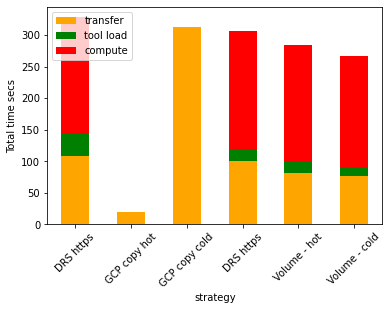

In [19]:
df5.plot.bar(x='strategy', stacked=True, ylabel='Total time secs',
            color=['orange', 'green', 'red'],
            rot=45)

In this example 'GCP copy hot' and 'GCP copy cold' used GCPs Storage Transfer method to copy the file **to a hot bucket** on Google Cloud storage. The files were copied in each case **from** a hot and cold bucket respectively. In this case we are only simulating the transfer step and not the tool load and compute. 

A number of conclusions can be drawn from this comparison. 
* copy from cold (archive) storage to hot is significantly slower
* copy from a hot bucket via a DRS provided URL to the hot storage used by the Seven Bridges compute platform does not achieve the potential benefits of being on the same cloud platform.
* Compared with the https transfer the penalty of the data being in cold storage is less (3 x slower) than the for the storage transfer comparison (15 x slower) 

The last two strategies shown are for the full workflow when the same two hot and cold buckets are accessed from Seven Bridges as a Volume. In this case a service account is created to allow access to the bucket. The credentials for the service account are provided to the Seven Bridges platform when the Volume is set up (See Seven Bridges documentation).

The hypothesis was that because access to the bucket is now provided through native GCP IAM that Seven Bridges would be able to achieve performance closer to the 'GCP copy hot' strategy. The expectation for 'Volume - cold' was similar - that it would likely be similar to 'GCP copy cold'. Neither of those happened in practice.

* Both 'Volume - Hot' and 'Volume - Cold' showed similar time for the transfer step.
* Both were slightly faster than the transfer under DRS https. The improvement is slight, but there is some variability. Some effort might be put into confirming that, but effort is probably better placed elsewhere.
* That the hot and cold volume took the same time was the real surprise.

For resolution of this it seems essential to understand:
* What kind of storage is used for the working directories to which SB transfers the files. (Assumption is that it is some kind of bucket storage - which is how many VMs are provided with storage).
* What APIs protocols are used to make the transfer for Volumes. (For DRS we know https is being used).
* Why might those protocols be able to provide such 'fast' access to cold storage.
* Is there some caching mechanism at work which means the cold file is more immediately available? This certainly can occur with 'intelligent tiering'; in fact it is reason for such tiering. However, no intelligent tiering was explicitly set up when the buckets were created. The 'archive' class was used - which is the class of storage used for 'cold' storage on SRA/dbGaP. 

### For interest: Check DRS access to a cold file via SB Cavatica DRS
We can use the id that Cavatica assigns to the linked file in a 'Volume' as a DRS id on the Cavatica DRS service.

As an experiment, we can see that under the right circumstances DRS can serve files from cold storage in an efficient manner. Those circumstances, and doing so under appropriate access control, require further investigation. The exploration here is to ensure that potentially relevant options are explored.

The value of such an empirical approach is at the heart of Agile principles and training. Possibilities should be explored in practice rather dismissed in discussion. 

In [20]:
from fasp.loc import cavaticaDRSClient
cav_drs = cavaticaDRSClient('~/.keys/sbcav_key.json','s3')

In [21]:
cav_drs.get_object('673cab110aa8f306d825f89b')

{'id': '673cab110aa8f306d825f89b',
 'name': 'HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522.bam',
 'size': 9196950908,
 'checksums': [{'type': 'etag',
   'checksum': '5d4ae7a46d470036d99429c363498965'}],
 'self_uri': 'drs://cavatica-ga4gh-api.sbgenomics.com/673cab110aa8f306d825f89b',
 'created_time': '2024-11-19T15:13:21Z',
 'updated_time': '2024-11-19T15:13:21Z',
 'mime_type': 'application/json',
 'access_methods': [{'type': 's3',
   'region': 'us-east-1',
   'authorizations': {'supported_types': ['BearerAuth'],
    'passport_auth_issuers': [],
    'bearer_auth_issuers': ['https://cavatica.sbgenomics.com/']},
   'access_id': 'aws-us-east-1'}]}

### Obtain the URL
As with any DRS service, the URL provided can be used to download the file. For display, the URL shown below is truncated from the full URL to avoid showing cloud credentials.

In [35]:
cold_url = cav_drs.get_access_url('673cab110aa8f306d825f89b', 's3')
# Truncate the url for display - so signed url credentials are not shown
clean_url = cold_url.split('?')[0]
print(clean_url)

https://storage.googleapis.com/imf-deep/HG00096.mapped.ILLUMINA.bwa.GBR.exome.20120522.bam


#### Is this file on AWS S3?
Note that though the access method above appears to show that the file is stored in s3 (Amazon AWS) this is only the 'link' to the file on Cavatica that the Seven Bridges platform created when I added the 'Volume'.

The url step confirms that the file itself is in Google Cloud storage.

As with any DRS service, the URL provided can be used to download the file. For display, the URL shown below is truncated from the full URL to avoid showing cloud credentials.